In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.spatial import distance
import copy
from multiprocessing import Pool

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


# load data files

In [2]:
# offswitches
off_gdict = {
            "AaCas12b":"AaCas12b_gRNA",
            "AkCas12b":"Ak_gRNA",
            "AsCas12a":"As_crRNA",
            "BvCas12b":"Bv_gRNA",
            "Cas14a1":"Cas14a1_gRNA",
            "CasRx":"CasRx_crRNA",
            "CdCas9":"Cd_gRNA",
            "CjCas9":"Cj_gRNA",
            "ClCas9":"Cl_gRNA",
            "FnCas12a":"Fn_crRNA",
            "FnCas9":"Fn_gRNA",
            "L7Ae":"BoxCD",
            "LbCas12a":"Lb_crRNA",
            "MS2CP(V29I)":"scMS2(WTx2)",
            "MbCas12a":"Mb_crRNA",
            "NcCas9":"Nc_gRNA",
            "NmCas9":"Nm_gRNA_v7",
            "No triiger":"No aptamer",
            "PP7CP":"scPP7(WTx2)",
            "PguCas13b":"Pgu_crRNA",
            "PlCas9":"Pl_gRNA",
            "PlmCasX":"PlmCasX_crRNA",
            "PspCas13b":"Psp_crRNA",
            "RanCas13b":"Ran_crRNA",
            "SaCas9":"Sa_gRNA",
            "SpCas9":"Sp_gRNA",
            "SpaCas9":"Spa_gRNA",
            "St1Cas9":"St1_gRNA",
            "St3Cas9":"St3_gRNA"}

drop_genes       = ["No triiger", "PP7CP", "L7Ae", "MS2CP(V29I)", "RanCas13b", "AsCas12a", "AaCas12b", "St1Cas9", "SpaCas9"]
drop_aptamers = [off_gdict[p] for p in drop_genes] + ["Nm_gRNA"]
necessary_genes = ["PspCas13b", "PguCas13b", "SaCas9"]


df0 = pd.read_excel("../datasets/Orthogonal OFF-3.xlsx", index_col = 0, sheet_name=0).drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)** -1
df1 = pd.read_excel("../datasets/Orthogonal OFF-3.xlsx", index_col = 0, sheet_name=1).drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)** -1
df2 = pd.read_excel("../datasets/Orthogonal OFF-3.xlsx", index_col = 0, sheet_name=2).drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)** -1
df_off = (df0 + df1 + df2)/3
df_off.head()

,Sp_gRNA,Sa_gRNA,Cj_gRNA,Fn_gRNA,Cd_gRNA,Cl_gRNA,Pl_gRNA,Nc_gRNA,St3_gRNA,Fn_crRNA,Lb_crRNA,Mb_crRNA,Ak_gRNA,Bv_gRNA,Psp_crRNA,Pgu_crRNA,CasRx_crRNA,PlmCasX_crRNA,Cas14a1_gRNA,Nm_gRNA_v7
Normalized2,,,,,,,,,,,,,,,,,,,,
SpCas9,24.131197,1.146943,1.162100,1.198282,1.363316,1.043135,0.968362,1.217529,11.341384,1.031328,1.471013,1.041417,0.990161,0.956357,1.316420,1.093326,1.230120,0.867707,0.976472,1.106130
SaCas9,1.166859,17.004156,1.125098,1.164570,1.056804,1.091671,1.027699,0.997617,1.057647,1.092555,1.133570,1.159295,0.960492,0.987471,1.195113,1.180024,0.969526,0.798036,1.255248,1.520191
CjCas9,1.134269,1.189191,10.715687,1.087075,0.949220,1.971760,0.961305,0.833721,1.046675,1.025841,1.151980,1.041101,1.002661,0.952238,1.161764,1.102160,0.963972,0.681172,1.025763,1.037257
NmCas9,1.119204,1.158848,1.182086,1.254170,1.204445,1.163758,0.902672,3.039941,0.933821,1.081634,1.134550,1.471686,1.384509,1.171191,0.981958,1.458738,1.087111,0.953434,0.971720,3.953683
FnCas9,1.154025,1.059005,1.157203,15.765383,1.124434,1.054094,1.166909,1.202844,1.114723,1.031112,1.089093,1.135195,1.095715,1.223047,1.206648,1.124270,0.996482,0.800500,1.120206,2.052760


In [3]:
# on switches
on_gdict = {
            "AaCas12b":"AaCas12b_gRNA",
            "AkCas12b":"Ak_gRNA",
            "AsCas12a":"As_crRNA",
            "BvCas12b":"Bv_gRNA",
            "Cas14a1":"Cas14a1_gRNA",
            "CasRx":"CasRx_crRNA",
            "CdCas9":"Cd_gRNA",
            "CjCas9":"Cj_gRNA",
            "ClCas9":"Cl_gRNA",
            "FnCas12a":"Fn_crRNA",
            "FnCas9":"Fn_gRNA",
            "L7Ae":"BoxCD",
            "LbCas12a":"Lb_crRNA",
            "MS2CP(V29I)":"scMS2(WTx2)",
            "MbCas12a":"Mb_crRNA",
            "NcCas9":"Nc_gRNA",
            "NmCas9":"Nm_gRNA",
            "No triiger":"No aptamer",
            "PP7CP":"scPP7(WTx2)",
            "PguCas13b":"Pgu_crRNA",
            "PlCas9":"Pl_gRNA",
            "PlmCasX":"PlmCasX_crRNA",
            "PspCas13b":"Psp_crRNA",
            "RanCas13b":"Ran_crRNA",
            "SaCas9":"Sa_gRNA",
            "SpCas9":"Sp_gRNA",
            "SpaCas9":"Spa_gRNA",
            "St1Cas9":"St1_gRNA",
            "St3Cas9":"St3_gRNA"}

df0 = pd.read_excel("../datasets/Crosstalk-ON.xlsx", index_col = 0, sheet_name=0)
df1 = pd.read_excel("../datasets/Crosstalk-ON.xlsx", index_col = 0, sheet_name=1)
df2 = pd.read_excel("../datasets/Crosstalk-ON.xlsx", index_col = 0, sheet_name=2)
df_on = (df0 + df1 + df2)/3

drop_genes       = ["No triiger", "St3Cas9", "PguCas13b", "PspCas13b", "CasRx"]
drop_aptamers = [on_gdict[p] for p in drop_genes]
necessary_genes = ["SaCas9", "CjCas9"]

df_on = df_on.drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)
df_on.head()

,Sp_gRNA,Sa_gRNA,Cj_gRNA,Nm_gRNA,St1_gRNA,Fn_gRNA,Cd_gRNA,Cl_gRNA,Pl_gRNA,Nc_gRNA,...,As_crRNA,Fn_crRNA,Lb_crRNA,Mb_crRNA,Ak_gRNA,Bv_gRNA,Ran_crRNA,PlmCasX_crRNA,Cas14a1_gRNA,AaCas12b_gRNA
Normalized2,,,,,,,,,,,,,,,,,,,,,
SpCas9,1.804307,1.017783,1.036308,0.849275,0.962779,1.047620,0.939252,0.955232,0.965700,0.885326,...,0.939046,0.983155,1.153299,0.979934,0.988375,1.047964,1.054943,1.045387,0.987064,1.081261
SaCas9,0.931671,5.678037,0.998645,0.985268,1.449663,0.907846,0.903523,0.882032,0.990814,1.053165,...,0.924433,0.949681,0.957126,0.951791,0.938839,0.983215,1.012077,0.910024,0.914731,0.911680
CjCas9,0.894951,0.974461,5.607344,1.061550,1.006955,0.905238,0.897507,1.490368,0.964822,1.101074,...,0.888961,0.937092,0.999005,0.963843,1.058241,1.029516,0.970051,0.958412,1.005516,0.933137
NmCas9,0.960144,1.048591,0.937783,3.163867,1.054675,0.970468,1.038188,0.946211,0.895049,2.465477,...,0.920707,0.961438,0.957644,1.048681,1.101581,1.008514,0.967562,1.030743,0.945572,0.943695
St1Cas9,0.986157,3.822979,1.094589,1.017571,2.392926,0.934474,0.855795,0.917770,0.998779,1.117891,...,1.025926,1.027061,1.002532,0.977393,1.093517,1.076203,0.976028,1.025731,2.061775,0.946979


# define functions

In [4]:
from itertools import combinations
from multiprocessing import Pool, get_context

def calc_min_intradist_m1(p_list, df, gdict):
    state = df[[gdict[gene] for gene in p_list]].loc[p_list] - 1
    
    def dist(state, pa,pb):
        d = distance.cosine(state.loc[pa], state.loc[pb])
        return d

    min_dist = float("inf")
    for i in range(len(p_list)):
        for j in range(len(p_list)):
            if i > j:
                d = dist(state, p_list[i], p_list[j])
                if d < min_dist:
                    min_dist = d
    return p_list, min_dist

gdict = off_gdict
calc_min_intradist_m1(df_off.index[:4], df_off, off_gdict)

(Index(['SpCas9', 'SaCas9', 'CjCas9', 'NmCas9'], dtype='object', name='Normalized2'),
 0.9132280310984244)

In [5]:
def generate_combi(genes, N_PROTEINS):
    genes_candidate = copy.copy(list(genes))
    necessary_genes = ["PspCas13b", "PguCas13b"]
    for ng in necessary_genes:
        genes_candidate.remove(ng)
    return [necessary_genes + list(others) for others in combinations(genes_candidate, N_PROTEINS-len(necessary_genes))]


def get_best(res_dist):
    best_combi = ()
    best_score = 0
    for c, s in res_dist:
        if s > best_score:
            best_combi = c
            best_score = s
    return best_combi, best_score


generate_combi(df_off.index, 4)[:5]

[['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'CjCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'NmCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'FnCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'CdCas9']]

# calc best off-switch combinations

In [7]:

off_best_combi_m1 = dict()


for N_PROTEINS in range(3, 18):
    with get_context("fork").Pool(7) as p:
        res_dist = p.starmap(
            calc_min_intradist_m1,
            [(l, df_off, off_gdict) for l in generate_combi(df_off.index.values, N_PROTEINS)]
        )
        p.close()
        
    off_best_combi_m1[N_PROTEINS] = get_best(res_dist)
    print(N_PROTEINS, get_best(res_dist))

3 (['PspCas13b', 'PguCas13b', 'MbCas12a'], 0.9883751022676787)
4 (['PspCas13b', 'PguCas13b', 'SaCas9', 'MbCas12a'], 0.9873157032109814)
5 (['PspCas13b', 'PguCas13b', 'SaCas9', 'FnCas9', 'MbCas12a'], 0.9838493524166163)
6 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'FnCas9', 'MbCas12a'], 0.9807369044976523)
7 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'FnCas9', 'MbCas12a', 'BvCas12b'], 0.9740819472454509)
8 (['PspCas13b', 'PguCas13b', 'SpCas9', 'CjCas9', 'FnCas9', 'MbCas12a', 'BvCas12b', 'CasRx'], 0.9723736077351652)
9 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'CjCas9', 'FnCas9', 'MbCas12a', 'BvCas12b', 'CasRx'], 0.9721245023939438)
10 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', 'NcCas9', 'St3Cas9', 'MbCas12a', 'BvCas12b', 'CasRx'], 0.9110303256469852)
11 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', 'NcCas9', 'St3Cas9', 'LbCas12a', 'BvCas12b', 'CasRx', 'Cas14a1'], 0.8689044306427869)
12 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', '

# calc best on-switch combinations

In [10]:
def generate_combi(genes, N_PROTEINS):
    genes_candidate = copy.copy(list(genes))
    # necessary_genes = ["PspCas13b", "PguCas13b"]
    for ng in necessary_genes:
        genes_candidate.remove(ng)
    return [necessary_genes + list(others) for others in combinations(genes_candidate, N_PROTEINS-len(necessary_genes))]


gdcit = on_gdict

on_best_combi_m1 = dict()

for N_PROTEINS in range(3, 18):
    with get_context("fork").Pool(7) as p:
        res_dist = p.starmap(
            calc_min_intradist_m1,
            [(l, df_on, on_gdict) for l in generate_combi(df_on.index.values, N_PROTEINS)]
        )
        p.close()
        
    on_best_combi_m1[N_PROTEINS] = get_best(res_dist)
    print(N_PROTEINS, get_best(res_dist))

3 (['SaCas9', 'CjCas9', 'RanCas13b'], 1.0058494631601649)
4 (['SaCas9', 'CjCas9', 'FnCas9', 'RanCas13b'], 0.9925565060389531)
5 (['SaCas9', 'CjCas9', 'FnCas9', 'RanCas13b', 'PlmCasX'], 0.9918111033947713)
6 (['SaCas9', 'CjCas9', 'FnCas9', 'FnCas12a', 'RanCas13b', 'PlmCasX'], 0.9821627063988836)
7 (['SaCas9', 'CjCas9', 'FnCas9', 'FnCas12a', 'BvCas12b', 'RanCas13b', 'PlmCasX'], 0.9738259570118218)
8 (['SaCas9', 'CjCas9', 'SpCas9', 'FnCas9', 'FnCas12a', 'AkCas12b', 'RanCas13b', 'PlmCasX'], 0.9691733356744047)
9 (['SaCas9', 'CjCas9', 'SpCas9', 'NmCas9', 'FnCas9', 'AsCas12a', 'BvCas12b', 'RanCas13b', 'PlmCasX'], 0.9402457033880318)
10 (['SaCas9', 'CjCas9', 'SpCas9', 'NmCas9', 'FnCas9', 'MbCas12a', 'AkCas12b', 'BvCas12b', 'RanCas13b', 'PlmCasX'], 0.8783473766464467)
11 (['SaCas9', 'CjCas9', 'SpCas9', 'NmCas9', 'FnCas9', 'MbCas12a', 'AkCas12b', 'BvCas12b', 'RanCas13b', 'PlmCasX', 'Cas14a1'], 0.8070428708480236)
12 (['SaCas9', 'CjCas9', 'SpCas9', 'FnCas9', 'NcCas9', 'FnCas12a', 'LbCas12a', 'Bv

# visualization

Text(0, 0.5, 'Distance')

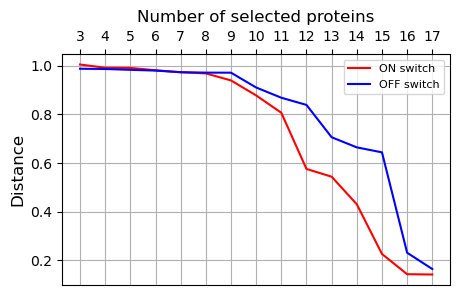

In [45]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True


fig, ax = plt.subplots(figsize = (5, 3))
ax.plot(on_best_combi_m1.keys(), [v[1] for v in on_best_combi_m1.values()], label = "ON switch", color = "red")
ax.plot(off_best_combi_m1.keys(), [v[1] for v in off_best_combi_m1.values()], label = "OFF switch", color = "blue")
ax.legend(fontsize = 8)
ax.grid()
ax.set_xticks(range(3,18));
ax.set_title("Number of selected proteins", fontsize = 12)
ax.set_ylabel("Distance", fontsize = 12)
